# Absence Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

### Data uploading

In [2]:
df = pd.read_excel("dzRF.xlsx")

### Explanatory Data Analysis

In [3]:
n_samples, n_features = df.shape

print("Количество наблюдений: ", n_samples)
print("Количество атрибутов: ", n_features)

Количество наблюдений:  1952
Количество атрибутов:  21


In [4]:
description = df.describe(include='all')

print("Статистика по данным:")
display(description)

Статистика по данным:


,book_tod,book_dow,book_category,book_staff,last_category,last_staff,last_day_services,last_receipt_tot,last_dow,last_tod,...,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,last_cumnoshow,noshow,recency
count,1717,1952,1952,1952,1003,1003,1952.000000,1952.000000,1003,858,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
unique,3,7,3,7,3,7,NaN,NaN,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,afternoon,Thursday,STYLE,JJ,STYLE,JJ,NaN,NaN,Thursday,afternoon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,735,417,1531,722,728,355,NaN,NaN,220,321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.545082,35.782679,NaN,NaN,...,0.114242,111.258197,1.906762,1.520492,0.325307,0.487193,0.280225,0.422643,0.114754,14.402152
std,NaN,NaN,NaN,NaN,NaN,NaN,0.658514,59.371877,NaN,NaN,...,0.318186,207.927702,3.315854,2.756585,0.827646,1.261275,0.853646,1.319786,0.318807,21.079495
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,60.000000,NaN,NaN,...,0.000000,132.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000


In [5]:
print("Количество пустых значений:")
display(df.isnull().sum())

Количество пустых значений:


book_tod              235
book_dow                0
book_category           0
book_staff              0
last_category         949
last_staff            949
last_day_services       0
last_receipt_tot        0
last_dow              949
last_tod             1094
last_noshow             0
last_prod_flag          0
last_cumrev             0
last_cumbook            0
last_cumstyle           0
last_cumcolor           0
last_cumprod            0
last_cumcancel          0
last_cumnoshow          0
noshow                  0
recency                 0
dtype: int64

### Data Wrangling

In [6]:
df = pd.get_dummies(df)

### EDA of prepared dataset

In [7]:
print("Количество наблюдений и атрибутов после замены категориальных переменных на фиктивные:", df.shape, end='\n\n')

print("Количество пустых значений после замены категориальных переменных на фиктивные:")
display(df.isnull().sum())

Количество наблюдений и атрибутов после замены категориальных переменных на фиктивные: (1952, 53)

Количество пустых значений после замены категориальных переменных на фиктивные:


last_day_services      0
last_receipt_tot       0
last_noshow            0
last_prod_flag         0
last_cumrev            0
last_cumbook           0
last_cumstyle          0
last_cumcolor          0
last_cumprod           0
last_cumcancel         0
last_cumnoshow         0
noshow                 0
recency                0
book_tod_afternoon     0
book_tod_evening       0
book_tod_morning       0
book_dow_Friday        0
book_dow_Monday        0
book_dow_Saturday      0
book_dow_Sunday        0
book_dow_Thursday      0
book_dow_Tuesday       0
book_dow_Wednesday     0
book_category_COLOR    0
book_category_MISC     0
book_category_STYLE    0
book_staff_BECKY       0
book_staff_HOUSE       0
book_staff_JJ          0
book_staff_JOANNE      0
book_staff_KELLY       0
book_staff_SINEAD      0
book_staff_TANYA       0
last_category_COLOR    0
last_category_MISC     0
last_category_STYLE    0
last_staff_BECKY       0
last_staff_HOUSE       0
last_staff_JJ          0
last_staff_JOANNE      0


In [8]:
display(df.describe(include='all'))

,last_day_services,last_receipt_tot,last_noshow,last_prod_flag,last_cumrev,last_cumbook,last_cumstyle,last_cumcolor,last_cumprod,last_cumcancel,...,last_dow_Friday,last_dow_Monday,last_dow_Saturday,last_dow_Sunday,last_dow_Thursday,last_dow_Tuesday,last_dow_Wednesday,last_tod_afternoon,last_tod_evening,last_tod_morning
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,...,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,0.545082,35.782679,0.076332,0.114242,111.258197,1.906762,1.520492,0.325307,0.487193,0.280225,...,0.111680,0.000512,0.088627,0.015881,0.112705,0.102459,0.081967,0.164447,0.112705,0.162398
std,0.658514,59.371877,0.265597,0.318186,207.927702,3.315854,2.756585,0.827646,1.261275,0.853646,...,0.315053,0.022634,0.284277,0.125048,0.316313,0.303329,0.274385,0.370775,0.316313,0.368910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,132.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,382.800000,1.000000,1.000000,1276.000000,20.000000,18.000000,7.000000,11.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


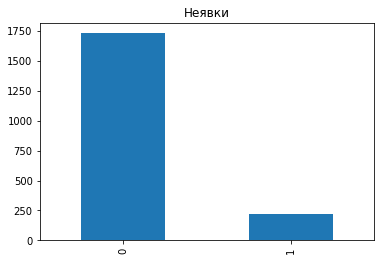

11.475410 процентов клиентов не явились по записи.


In [9]:
df['noshow'].value_counts().plot(kind='bar')
plt.title("Неявки")
plt.show();

print("%f процентов клиентов не явились по записи." %((df.noshow[df.noshow==1].count()/df.noshow.count())*100))

In [10]:
corr = df.corr()

triangle = corr.abs().where(np.tril(np.ones(corr.shape), k=-1).astype(np.bool))
print("Самая сильная корреляция:")
print(triangle.stack().sort_values(ascending=False)[:10])

Самая сильная корреляция:
last_cumstyle        last_cumbook           0.971779
last_cumbook         last_cumrev            0.946657
last_cumstyle        last_cumrev            0.942458
book_category_STYLE  book_category_COLOR    0.886694
last_cumnoshow       last_cumstyle          0.810319
last_cumprod         last_cumcolor          0.803109
last_staff_JOANNE    last_category_COLOR    0.782214
book_staff_JOANNE    book_category_COLOR    0.772077
last_cumnoshow       last_cumbook           0.766798
                     last_cumrev            0.764871
dtype: float64


In [11]:
to_drop = ['last_cumbook', 'last_cumstyle', 'book_category_COLOR']
df = df.drop(to_drop, axis=1)

print("Количество атрибутов после удаления сильно скоррелированных атрибутов:", df.shape[1])

Количество атрибутов после удаления сильно скоррелированных атрибутов: 50


### Data splitting

In [12]:
y = df.noshow
X = df.drop('noshow', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Model defining

In [13]:
clf = RandomForestClassifier(random_state=47, n_jobs=-1, n_estimators=200, class_weight='balanced_subsample')

### Paramters for hypertuning

In [14]:
param_distributions = {"max_features": list(range(1, X.shape[1])), "max_depth": list(range(5, 30))}

### Model fitting

In [15]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Результат на тестовых данных (модель по умолчанию): %f" % (100*metrics.balanced_accuracy_score(y_test, y_pred)))

Результат на тестовых данных (модель по умолчанию): 66.297127


### Finding best hyperparameters

In [16]:
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring="balanced_accuracy", n_jobs=-1)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced_subsample',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,

### Model evalutaion

In [17]:
model = random_search.best_estimator_

print("Оптимальные параметры: %s, оценка на учебных данных: %0.2f" % (random_search.best_params_, random_search.best_score_))

Оптимальные параметры: {'max_features': 48, 'max_depth': 5}, оценка на учебных данных: 0.81


In [18]:
y_pred = model.predict(X_test)

print("Результат на тестовых данных: %f" % (100 * metrics.balanced_accuracy_score(y_test, y_pred)))

Результат на тестовых данных: 84.591493


In [19]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Матрица неточностей:")
display(pd.DataFrame(cnf_matrix))

Матрица неточностей:


,0,1
0,483,36
1,16,51


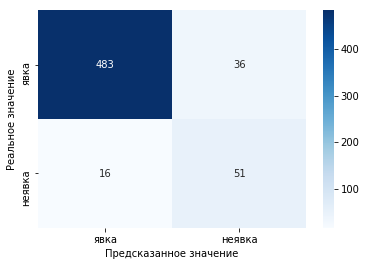

In [20]:
sb.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=["явка", "неявка"], yticklabels=["явка", "неявка"])
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')
plt.show();

### Feature Importance

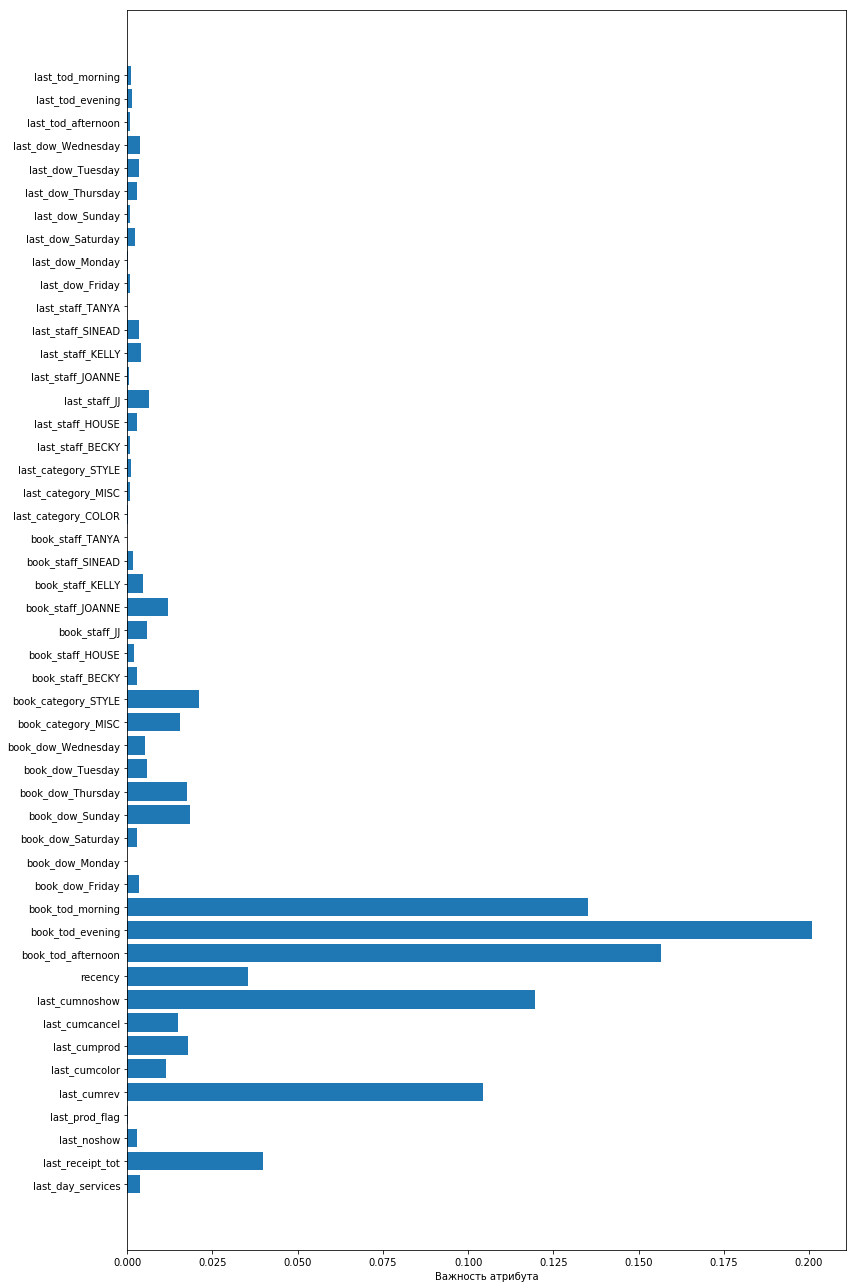

In [21]:
n_features = X.shape[1]
plt.figure(figsize=(12,18))
plt.barh(range(n_features), model.feature_importances_)
plt.yticks(np.arange(n_features), X.columns.values.tolist(), fontstretch='ultra-expanded')
plt.xlabel("Важность атрибута")
plt.tight_layout()
plt.show();

In [22]:
tree = model.estimators_[0]

export_graphviz(tree, out_file="tree.dot", class_names=["No churn", "Churn"],
                feature_names = X.columns.values.tolist(), impurity=False)

with open("tree.dot") as f:
    tree_graph = f.read()

graphviz.Source(tree_graph, filename="tree", format='png').view()

'tree.png'